In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

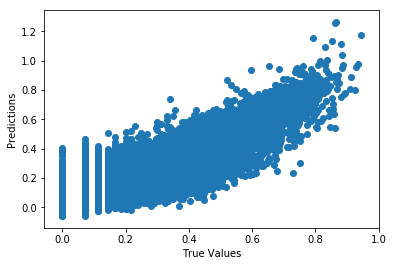

[ -2.83691236e+08   2.83691236e+08   2.83691236e+08   2.83691236e+08
   2.83691236e+08   8.50242376e-03  -2.80496478e-03   1.04728788e-02
   9.50181484e-03  -6.18168153e-04  -5.75035810e-05   2.10493803e-04
  -3.71560454e-05   6.57998025e-04   5.74931502e-04  -1.74738467e-04
  -2.44647264e-04   1.00284815e-05   5.44864684e-03  -1.79067254e-03
  -3.50184746e-01   2.96483815e-01  -9.00984419e+01  -1.05620084e+01
  -4.47914000e+03   4.63493671e+03   2.42405937e-01   6.82004295e-01
   1.34825706e-04  -1.08629465e-05  -1.85147373e-01   1.81560090e-01
   1.05846065e+02  -1.47887470e-02   1.76721598e-01   2.03131203e-01
  -6.54666526e-02  -5.18684275e-03  -6.39836909e-03]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.73063324  0.72703271  0.72987572  0.7381414 ]


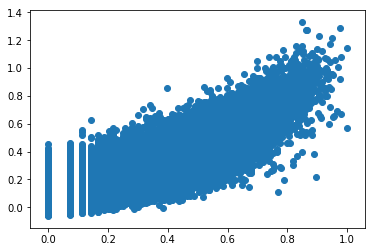

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.731718062093


In [9]:
print(lm.coef_)

[ -2.83691236e+08   2.83691236e+08   2.83691236e+08   2.83691236e+08
   2.83691236e+08   8.50242376e-03  -2.80496478e-03   1.04728788e-02
   9.50181484e-03  -6.18168153e-04  -5.75035810e-05   2.10493803e-04
  -3.71560454e-05   6.57998025e-04   5.74931502e-04  -1.74738467e-04
  -2.44647264e-04   1.00284815e-05   5.44864684e-03  -1.79067254e-03
  -3.50184746e-01   2.96483815e-01  -9.00984419e+01  -1.05620084e+01
  -4.47914000e+03   4.63493671e+03   2.42405937e-01   6.82004295e-01
   1.34825706e-04  -1.08629465e-05  -1.85147373e-01   1.81560090e-01
   1.05846065e+02  -1.47887470e-02   1.76721598e-01   2.03131203e-01
  -6.54666526e-02  -5.18684275e-03  -6.39836909e-03]
